In [1]:
import pandas as pd
import numpy as np

Implement a decision tree classifier. For each week, your feature set is (μ, σ) for that week. Use your labels (you will have 52 labels per year for each week) from year 1 to train your classifier and predict labels for year 2. Use ”entropy” as the splitting criteria (this is the default)
Questions:
1. implement a decision tree and compute its accuracy for year 2
2. compute the confusion matrix for year 2
3. what is true positive rate and true negative rate for year 2?
4. implement a trading strategy based on your labels for year 2 and compare the performance with the ”buy-and-hold” strategy. Which strategy results in a larger amount at the end of the year?

In [17]:
df20 = pd.read_csv('feature20.csv')
df21 = pd.read_csv('feature21.csv')
df20.rename(columns={'x20':'x','y20':'y','z20':'z'},inplace=True)
df21.rename(columns={'x21':'x','y21':'y','z21':'z'},inplace=True)
X_train = df20[['x','y']]
y_train = df20[['z']]
X_test = df21[['x','y']]
y_test = df21[['z']]

In [18]:
y_test['z'][51]='red'

<ipython-input-18-f1b2112e0346>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['z'][51]='red'


In [19]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

In [20]:
clf = DecisionTreeClassifier()

# Training Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predicting the response for test dataset
y_pred = clf.predict(X_test)

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 2,  8],
       [11, 31]])

Implement a random forest classifier. For each week, your fea- ture set is (μ, σ) for that week. Use your labels (you will have 52 labels per year for each week) from year 1 to train your classifier and predict labels for year 2. Recall that are two hyper-parameters in the random forest classifier
1. N - number of (sub)trees to use 2. d - max depth of each subtree
Questions:
1. take N = 1,...,10 and d = 1,2,...,5. For each value of N and d construct a random tree classifier (use ”entropy” as splitting criteria - this is the default) use your year 1 labels as training set and compute the error rate for year 2. Plot your error rates and find the best combination of N and d.
2. using the optimal values from year 1, compute the confusion matrix for year 2
3. what is true positive rate and true negative rate for year 2?

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

<ipython-input-22-26b02ae2b86b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [23]:
param_grid = {
    'n_estimators': [1,2,3,4,5,6,7,8,9,10],
    'max_depth': [1,2,3,4,5]
}

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
y=[]
from sklearn.metrics import accuracy_score
for i in range(1,11):
  for j in range(1,6):
    model = RandomForestClassifier(max_depth=j,n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    err = 1-accuracy_score(y_test, y_pred)
    y.append(err)


#print(classification_report(y_pred_grid, y_test))

<ipython-input-25-232373bd6a5a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-25-232373bd6a5a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-25-232373bd6a5a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-25-232373bd6a5a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-25-232373bd6a5a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [26]:
y

[0.23076923076923073,
 0.3076923076923077,
 0.3846153846153846,
 0.3653846153846154,
 0.32692307692307687,
 0.25,
 0.32692307692307687,
 0.28846153846153844,
 0.28846153846153844,
 0.46153846153846156,
 0.25,
 0.40384615384615385,
 0.4423076923076923,
 0.34615384615384615,
 0.3846153846153846,
 0.42307692307692313,
 0.46153846153846156,
 0.34615384615384615,
 0.32692307692307687,
 0.32692307692307687,
 0.21153846153846156,
 0.5,
 0.34615384615384615,
 0.4423076923076923,
 0.42307692307692313,
 0.42307692307692313,
 0.28846153846153844,
 0.42307692307692313,
 0.34615384615384615,
 0.3653846153846154,
 0.40384615384615385,
 0.3076923076923077,
 0.2692307692307693,
 0.34615384615384615,
 0.28846153846153844,
 0.23076923076923073,
 0.40384615384615385,
 0.2692307692307693,
 0.42307692307692313,
 0.3076923076923077,
 0.21153846153846156,
 0.4423076923076923,
 0.3653846153846154,
 0.2692307692307693,
 0.3653846153846154,
 0.40384615384615385,
 0.2692307692307693,
 0.23076923076923073,
 0.384

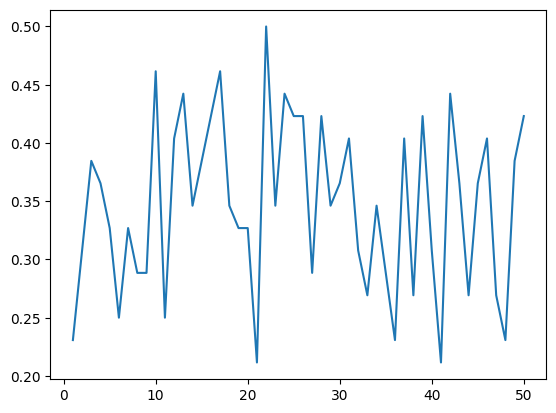

In [27]:
import matplotlib.pyplot as plt
x = [i for i in range(1,51)]
plt.plot(x,y)
#model with least error => n=10, d=1

In [28]:
best_rf = RandomForestClassifier(max_depth=1,n_estimators=10)
best_rf = RandomForestClassifier(max_depth=j,n_estimators=i)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

<ipython-input-28-38fb33e2265d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(X_train, y_train)


array([[ 1,  9],
       [15, 27]])

Implement an Adaboost classifier. For each week, your feature set is (μ,σ) for that week. Use your labels (you will have 52 labels per year for each week) from year 1 to train your classifier and predict labels for year 2. Recall that are two hyper-parameters in the random forest classifier
1. N - number of ”weak” learners to use 
2. d - base learner (base estimator)
3. learning rate λ


Questions:
1. take λ = 0.5 and λ = 1. For each lambda, construct an Adaboost classifier with any three base estimators of your choice (e.g. logistic regression, naive bayesian, k-NN). Use your year 1 labels as training set and compute the error rate for year 2. Plot your error rates as you change N from 1 to 15.
2. for each base estimator, what is the best value N∗ for learn- ing rate λ = 0.5?
3. what is your accuracy for each base estimator choice (as- suming the best N∗ for that estimator)
4. what classifier is best to use as base estimator for your data?
5. implement a trading strategy (using the Adaboost with the best estimator) based on your labels for year 2 and compare the performance with the ”buy-and-hold” strategy. Which strategy results in a larger amount at the end of the year?

In [36]:
l = [0.5,1]
n = [i for i in range(1,16)]
svc=SVC(probability=True, kernel='linear')
base = [svc, rf, clf]
err1 = []
err2 = []

from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
for b in base:
  for ne in n:
    lr=0.5
    abc = AdaBoostClassifier(n_estimators=ne, base_estimator=b, learning_rate=lr)
    model = abc.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    err1.append(1-accuracy_score(y_test, y_pred))

for b in base:
  for ne in n:
    lr=1
    abc = AdaBoostClassifier(n_estimators=ne, base_estimator=b, learning_rate=lr)
    model = abc.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    err2.append(1-accuracy_score(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

In [35]:
min(err)

0.25

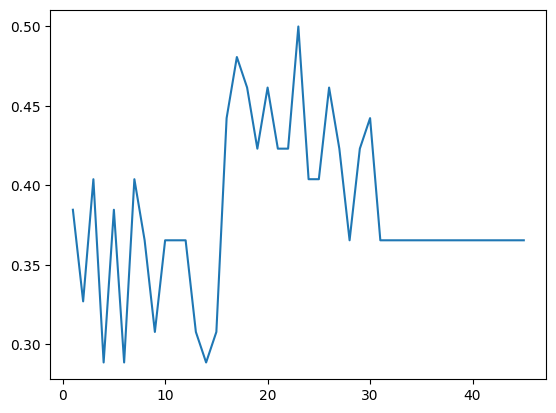

In [39]:
x1 = [i for i in range(1,46)]
plt.plot(x1,err1)

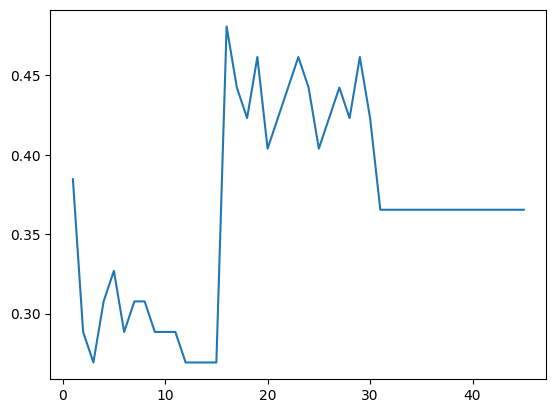

In [40]:
plt.plot(x1,err2)

In [41]:
min(err1)

0.28846153846153844

In [42]:
min(err2)

0.2692307692307693

In [43]:
err1.index(min(err1))#svc2

3

In [44]:
err2.index(min(err2))#svc3

2

In [45]:
abc = AdaBoostClassifier(n_estimators=2, base_estimator=svc, learning_rate=0.5)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [46]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 1,  9],
       [12, 30]])